<a href="https://colab.research.google.com/github/oarthurcarvalho/100DaysofCode/blob/main/Analisando_os_Dados_do_Airbnb_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Obtendo os Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv')


## 2. Análise de Dados

1. `id` - Número de id gerado para identificar o imóvel
2. `name` - Nome da propriedade
3. `host_id` - Número de id do proprietário (anfitrião) da propriedade
4. `host_name` - Nome do Anfitrião
5. `neighbourhood_group` - Não contém nenhum valor válido
6. `neighbourhood` - nome do bairro
7. `latitude` - coordenada da latitude da propriedade
8. `longitude` - coordenada da longitude da propriedade 
9. `room_type` - informa o tipo de quarto que é oferecido
10. `price` - preço para alugar o imóvel
11. `minimum_nights` - quantidade mínima de noites para reservar
12. `number_of_reviews` - número de reviews que a propriedade possui
13. `last_review` - data do último review
14. `reviews_per_month` - quantidade de reviews por mês
15. `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
16. `availability_365` - número de dias de disponibilidade dentro de 365 dias
17. `number_of_reviews_ltm` - O número de reviews que a propriedade teve nos últimos 12 meses.
18. `license` - A licensaThe licence/permit/registration number

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


### 1.3 Hipóteses

#### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
print('Número de linhas  = ', df.shape[0])
print('Número de colunas = ', df.shape[1])

Número de linhas  =  24549
Número de colunas =  18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24549 non-null  int64  
 1   name                            24528 non-null  object 
 2   host_id                         24549 non-null  int64  
 3   host_name                       24534 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24549 non-null  object 
 6   latitude                        24549 non-null  float64
 7   longitude                       24549 non-null  float64
 8   room_type                       24549 non-null  object 
 9   price                           24549 non-null  int64  
 10  minimum_nights                  24549 non-null  int64  
 11  number_of_reviews               24549 non-null  int64  
 12  last_review                     

#### **Q2. Qual a porcentagem de valores ausentes no dataset?**

In [6]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False).round(2)

license                           100.00
neighbourhood_group               100.00
reviews_per_month                  36.50
last_review                        36.50
name                                0.09
host_name                           0.06
number_of_reviews                   0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
id                                  0.00
minimum_nights                      0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
price                               0.00
dtype: float64

#### **Q3. Qual o tipo de distribuição das variáveis?**

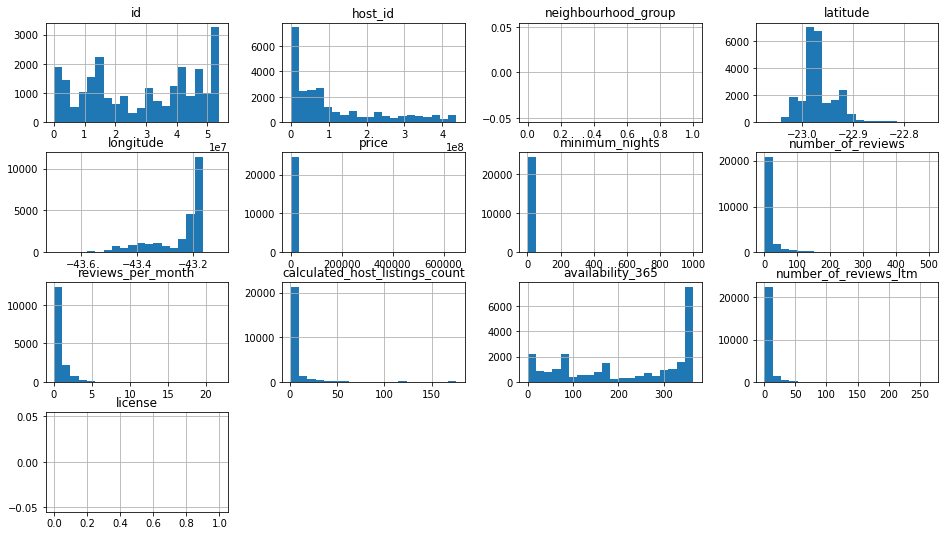

In [7]:
df.hist(bins=20, figsize=(16,9));

In [8]:
colunas_distribuicao = [
                        'price', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'calculated_host_listings_count',
                        'availability_365', 'number_of_reviews_ltm'
                       ]

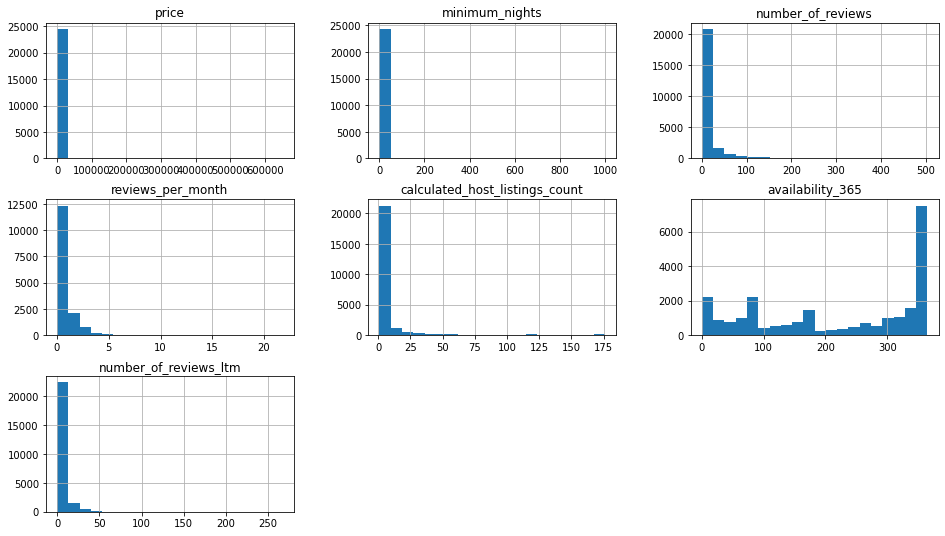

In [9]:
df[colunas_distribuicao].hist(bins=20, figsize=(16,9));

#### **Q4. Há outliers presente?**

In [10]:
df[colunas_distribuicao].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24549.00,24549.00,24549.00,15588.00,24549.00,24549.00,24549.00
mean,1029.59,5.09,14.51,0.69,7.07,218.95,3.58
std,5403.74,21.21,34.05,0.94,20.05,133.73,8.35
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,250.00,2.00,0.00,0.09,1.00,86.00,0.00
50%,479.00,3.00,2.00,0.31,1.00,257.00,0.00
75%,900.00,4.00,12.00,0.96,4.00,355.00,3.00
max,650476.00,1000.00,504.00,21.79,176.00,365.00,267.00


In [23]:
def plot_boxplot(dataframe, variaveis):
    
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 9))

    plt.subplot(4, 2, 1)
    dataframe['price'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 2)
    dataframe['minimum_nights'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 3)
    dataframe['number_of_reviews'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 4)
    dataframe['reviews_per_month'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 5)
    dataframe['calculated_host_listings_count'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 6)
    dataframe['availability_365'].plot(kind='box', vert=False)

    plt.subplot(4, 2, 7)
    dataframe['number_of_reviews_ltm'].plot(kind='box', vert=False)

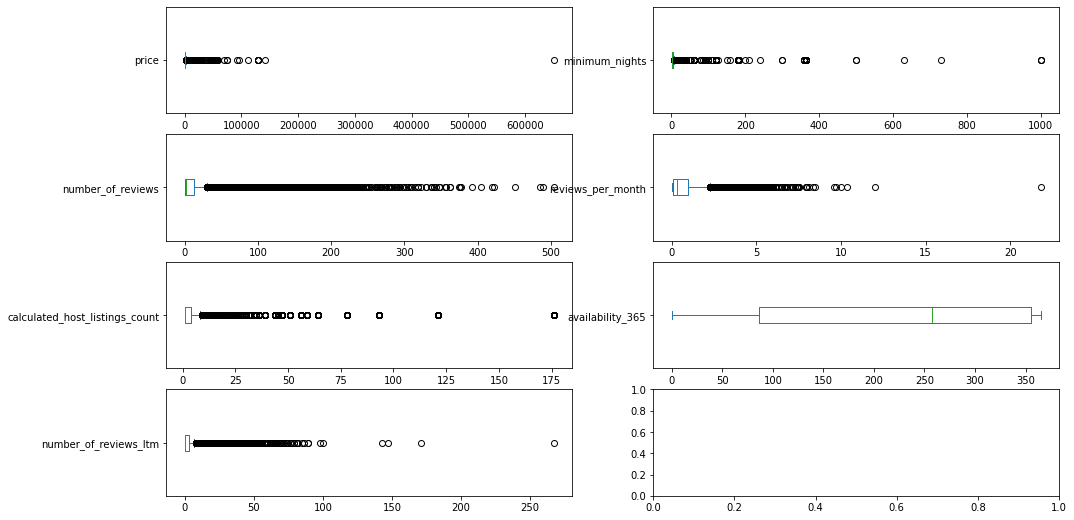

In [12]:
plot_boxplot(df, colunas_distribuicao)

In [13]:
def remover_outlier(df, lista_variavel):

    df_temp = df.copy()

    for variavel in lista_variavel:
        q1 = df_temp[variavel].quantile(.25)
        q3 = df_temp[variavel].quantile(.75)

        iqr = q3 - q1

        inner_fence = 1*iqr
        outer_fence = 3*iqr

        # limites internos
        inner_fence_le = q1 - inner_fence
        inner_fence_ue = q3 + inner_fence

        # limites externos
        outer_fence_le = q1 - outer_fence
        outer_fence_ue = q3 + outer_fence

        df_temp = df_temp[(
            df_temp[variavel] > inner_fence_le) & (
                df_temp[variavel] < inner_fence_ue
        )]

    return df_temp

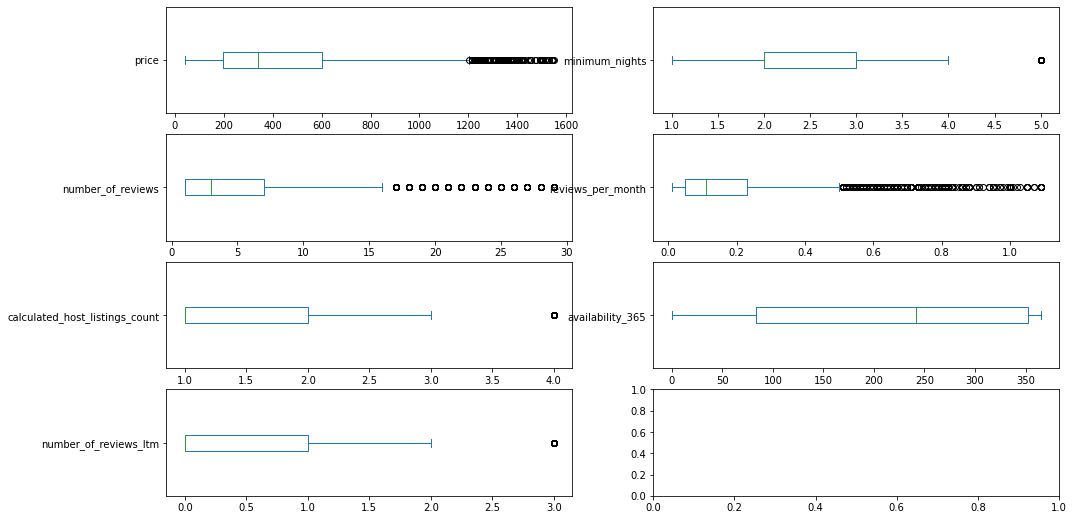

In [24]:
df_clean = remover_outlier(df, colunas_distribuicao)
plot_boxplot(df_clean, colunas_distribuicao)

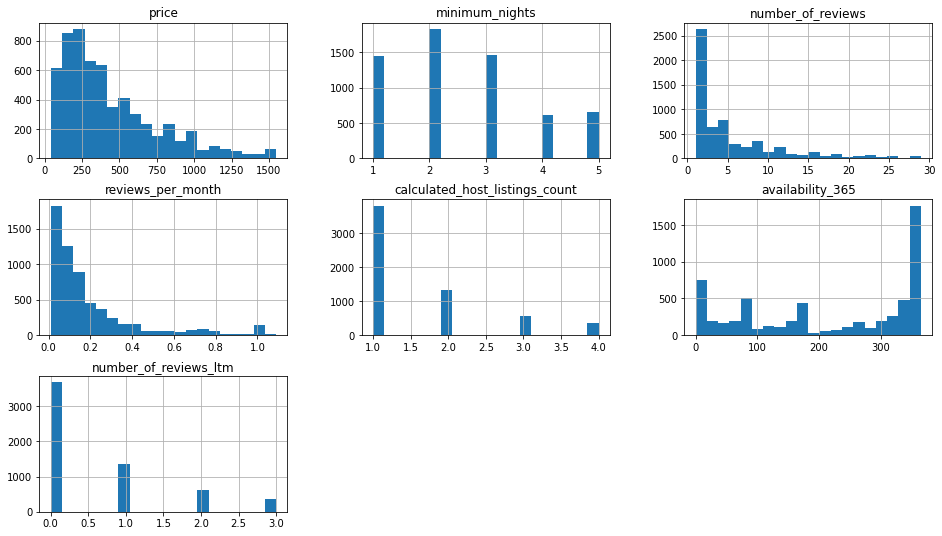

In [25]:
df_clean[colunas_distribuicao].hist(bins=20, figsize=(16,9));

#### **Q5. Qual a média dos preços de aluguel?**

In [56]:
media_preco = round(df_clean['price'].mean(), 2)
std_preco = round(df_clean['price'].std(), 2)

print(f'{media_preco} ± {std_preco}')

435.24 ± 322.13


#### **Q6. Qual a correlação existente entre as variáveis?**

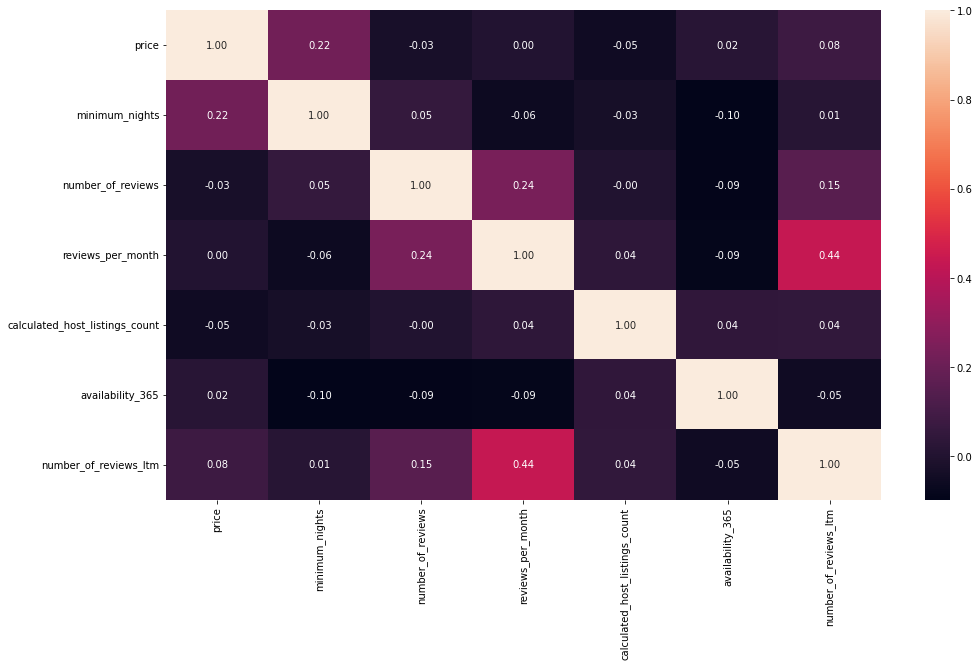

In [35]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(df_clean[colunas_distribuicao].corr(), fmt='.2f', annot=True)

#### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [37]:
df_clean['room_type'].value_counts()

pandas.core.series.Series

#### **Q8. Qual a localidade mais cara do dataset?**

In [57]:
preco_medio_por_bairro = df_clean.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)
contagem_por_bairro = df_clean['neighbourhood'].value_counts()

df_preco_contagem = pd.concat([preco_medio_por_bairro, contagem_por_bairro], axis=1).sort_values(by='price', ascending=False)

df_preco_contagem.head(10)

,price,neighbourhood
Leblon,665.94,238
Alto da Boa Vista,640.25,4
Lagoa,624.27,55
Ipanema,596.30,427
Complexo do Alemão,550.00,2
Vila Valqueire,537.67,3
Bangu,536.50,2
Barra da Tijuca,525.58,581
Vargem Grande,512.26,19
Campo Grande,491.29,14


In [58]:
df_clean['price'].max()

1549

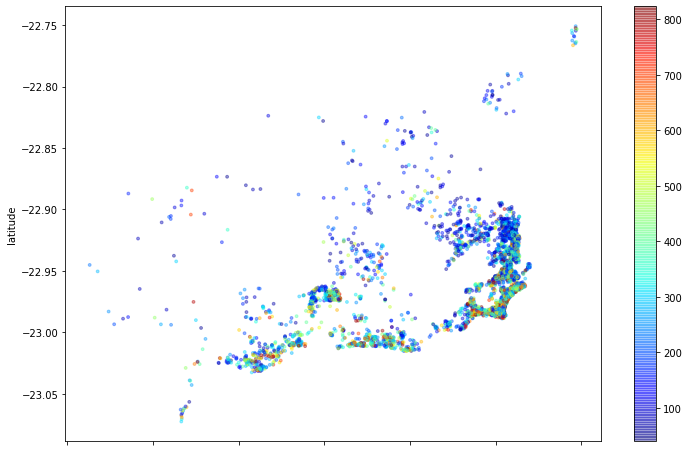

In [62]:
#@title Plotando imóveis por preço
#@markdown Ajuste os parametros

preco_max = 824  #@param {type: "slider", min: 0, max: 1549}

#@markdown ---

df_graph = df_clean[df_clean['price'] < preco_max]

df_graph.plot(kind="scatter", x='longitude', y='latitude',
              alpha=0.4, c=df_graph['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


#### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [55]:
media_minimo_noites = round(df_clean['minimum_nights'].mean(), 2)
std_minimo_noites = round(df_clean['minimum_nights'].std(), 2)

print(f'{media_minimo_noites} ± {std_minimo_noites}')

2.53 ± 1.26
